# 📚 Usamos apenas teste Z para proporções

Usamos o teste Z para proporções — e não o teste t — mesmo quando temos amostras pequenas.

🧠 Por que usamos o teste Z para proporções?

**1. Distribuição da proporção já é conhecida:**

A proporção de sucessos (p̂) segue aproximadamente uma distribuição normal (pela aproximação da binomial pela normal) quando n⋅p⋅(1−p)≥5

Portanto, não é necessário estimar desvio-padrão populacional como no teste t

**2. A variância da proporção é calculável diretamente:**

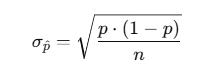

Essa fórmula depende apenas de p (hipotética ou combinada), e não exige estimativa amostral como na média

**3. O teste t é baseado em variância amostral, o que:**
* Faz sentido para médias
* Não se aplica para proporções, que têm variância teórica definida pela binomial



#📌 Teste Z para 1 Proporção

**🎯 Cenário:**

Suposição: 20% da população falta à consulta. Após campanha, amostra com 100 pacientes mostra 12 faltas.

In [ ]:
dados_1prop = pd.DataFrame({
    "Paciente": range(1, 101),
    "Faltou": [1]*12 + [0]*88
})

In [ ]:
dados_1prop

,Paciente,Faltou
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
95,96,0
96,97,0
97,98,0
98,99,0


#### 🧪 Especifique as Hipóteses

* H0: p = 0.20  (proporção de faltas é 20%)
* H1: p < 0.20  (proporção de faltas é menor após campanha)

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [ ]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

* Variável binária, 1 amostra grande → z para 1 proporção

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [ ]:
sucessos = dados_1prop["Faltou"].sum()   # número de faltas observadas
nobs = len(dados_1prop)                 # tamanho da amostra
p0 = 0.20                               # proporção de referência (histórica)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# Teste z para 1 proporção
z_stat, p_valor = proportions_ztest(count=sucessos, nobs=nobs, value=p0, alternative='smaller')
z_stat, p_valor

(np.float64(-2.4618298195866553), np.float64(0.0069115119101883105))

In [ ]:
from scipy.stats import norm

In [ ]:
# Valor crítico
z_critico = norm.ppf(alpha)
z_critico

np.float64(-1.6448536269514729)

In [ ]:
import matplotlib.pyplot as plt

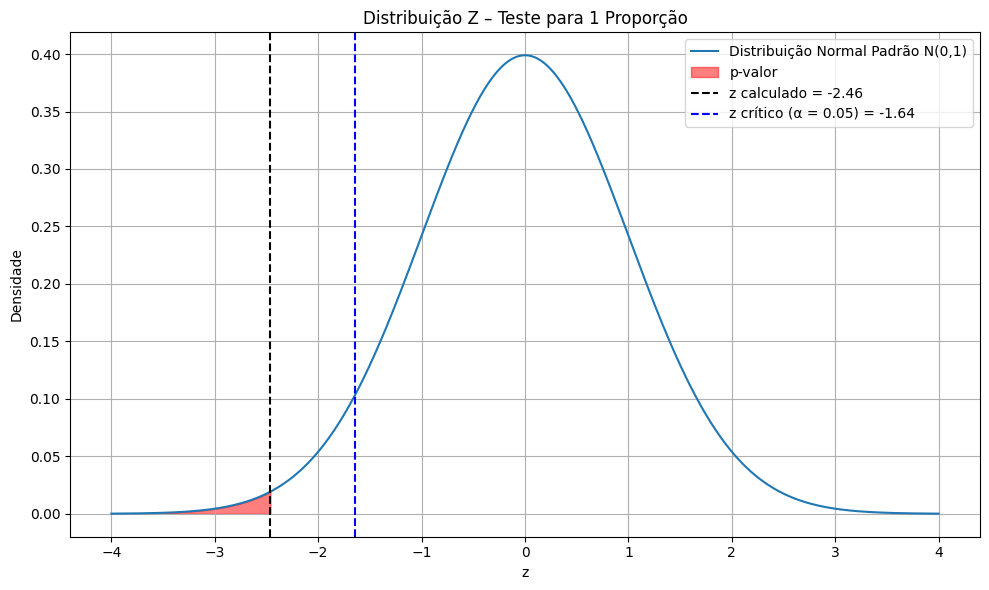

In [ ]:
# Gráfico
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label="Distribuição Normal Padrão N(0,1)")
ax.fill_between(x, 0, y, where=(x <= z_stat), color="red", alpha=0.5, label="p-valor")
ax.axvline(z_stat, color="black", linestyle="--", label=f"z calculado = {z_stat:.2f}")
ax.axvline(z_critico, color="blue", linestyle="--", label=f"z crítico (α = {alpha}) = {z_critico:.2f}")
ax.set_title("Distribuição Z – Teste para 1 Proporção")
ax.set_xlabel("z")
ax.set_ylabel("Densidade")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

####📈 Passo 5 – Interprete os Resultados

Como z < z crítico e p < 0,05, rejeitamos H₀

Há evidência estatística significativa de que a proporção de faltas diminuiu após a campanha educativa



# 📌 Teste Z para 2 Proporções

**🎯 Cenário:**

* Grupo A (vacina): 100 pacientes, 10 desenvolveram a doença (proporção = 10%)
* Grupo B (placebo): 100 pacientes, 25 desenvolveram a doença (proporção = 25%)

In [ ]:
import numpy as np
import pandas as pd

dados_2prop = pd.DataFrame({
    "Grupo": ["A"] * 100 + ["B"] * 100,
    "Infectado": [1]*10 + [0]*90 + [1]*25 + [0]*75
})

In [ ]:
dados_2prop

,Grupo,Infectado
0,A,1
1,A,1
2,A,1
3,A,1
4,A,1
...,...,...
195,B,0
196,B,0
197,B,0
198,B,0


#### 🧪 Especifique as Hipóteses

* H0: p1 = p2 → proporções iguais entre os grupos
* H1: p1 < p2 → proporção de infectados menor no grupo A

#### ✏️ Passo 2 – Defina o Nível de Significância

* Vamos adotar α = 0,05 (5%)
* Isso significa que aceitamos 5% de chance de rejeitar H₀ mesmo que ela seja verdadeira (erro tipo I)

In [ ]:
alpha = 0.05

####🧮 Passo 3 – Escolha o Teste Adequado

* Duas amostras independentes, variável binária → z para 2 proporções

####📏 Passo 4 – Calcule a Estatística de Teste / Valor-p

In [ ]:
sucessos = [
    dados_2prop[(dados_2prop["Grupo"] == "A") & (dados_2prop["Infectado"] == 1)].shape[0],
    dados_2prop[(dados_2prop["Grupo"] == "B") & (dados_2prop["Infectado"] == 1)].shape[0]
]
nobs = [100, 100]

In [ ]:
# Teste z para duas proporções (H1: proporção A < proporção B)
z_stat, p_valor = proportions_ztest(count=sucessos, nobs=nobs, alternative='smaller')
z_stat, p_valor

(np.float64(-2.7914526311954124), np.float64(0.00262360186955782))

In [ ]:
# Valor crítico
z_critico = norm.ppf(alpha)
z_critico

np.float64(-1.6448536269514729)

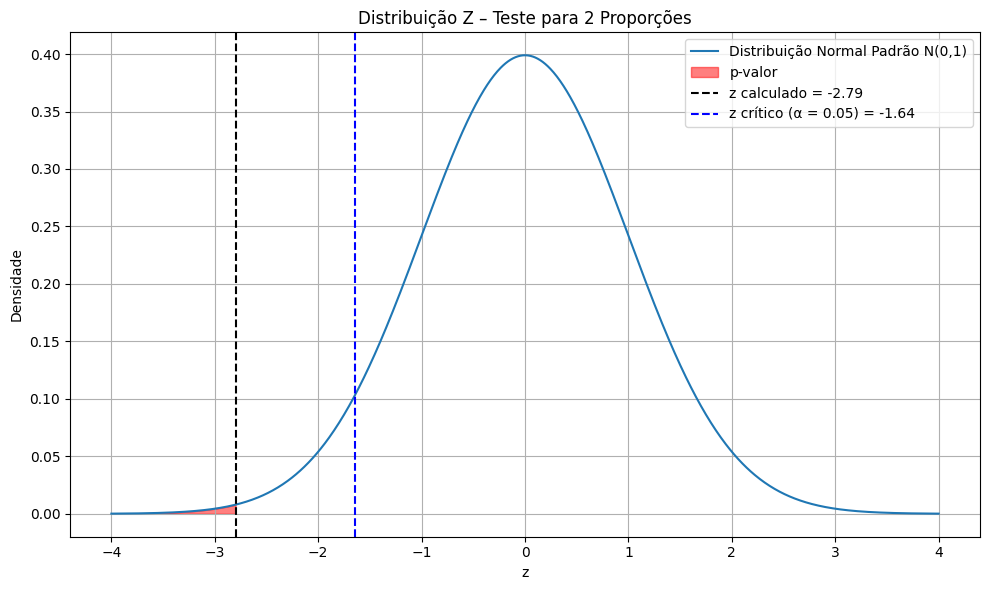

In [ ]:
# Gráfico
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label="Distribuição Normal Padrão N(0,1)")
ax.fill_between(x, 0, y, where=(x <= z_stat), color="red", alpha=0.5, label="p-valor")
ax.axvline(z_stat, color="black", linestyle="--", label=f"z calculado = {z_stat:.2f}")
ax.axvline(z_critico, color="blue", linestyle="--", label=f"z crítico (α = {alpha}) = {z_critico:.2f}")
ax.set_title("Distribuição Z – Teste para 2 Proporções")
ax.set_xlabel("z")
ax.set_ylabel("Densidade")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


####📈 Passo 5 – Interprete os Resultados

Como z < z crítico e p < 0,05, rejeitamos H₀

Há evidência estatística significativa de que a proporção de infectados no grupo vacinado (Grupo A) é menor do que no grupo controle (Grupo B)

